# Recommender System fo News

<img src="https://mediaengagement.org/wp-content/uploads/2016/06/shutterstock_297892517-600x374.jpg" alt="Economic News">

<a href="https://statso.io/news-recommendation-case-study/" target="_blank">Data burada</a>

* Bu projede amacımız okuyucunun okuduğu makalenin içeriğine göre bir tavsiye sistemi geliştirmektir.
Tüm popüler haber siteleri, okuduğunuz haberler ile kendi sitelerindeki diğer haber yazıları arasındaki benzerlikleri bulmak ve en benzer haber makalelerini önermek için tasarlanmış içerik tabanlı öneri sistemlerini kullanır. 

In [1]:
#!pip install neattext

In [2]:
import pandas as pd

In [3]:
import neattext.functions as nfx
import gc

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_rows', None)

## EDA

In [6]:
df=pd.read_csv("News.csv")

In [7]:
df.head()

,ID,News Category,Title,Summary
0,N88753,lifestyle,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the..."
1,N45436,news,Walmart Slashes Prices on Last-Generation iPads,Apple's new iPad releases bring big deals on l...
2,N23144,health,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...
3,N86255,health,Dispose of unwanted prescription drugs during ...,NaN
4,N93187,news,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101527 entries, 0 to 101526
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ID             101527 non-null  object
 1   News Category  101527 non-null  object
 2   Title          101527 non-null  object
 3   Summary        96112 non-null   object
dtypes: object(4)
memory usage: 3.1+ MB


In [9]:
df.isnull().sum()

,0
ID,0
News Category,0
Title,0
Summary,5415


## DATA VISUALIZATION

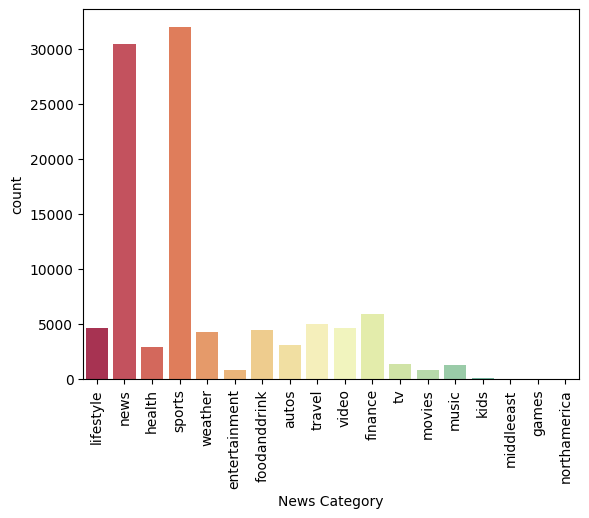

In [10]:
sns.countplot(x=df['News Category'], hue=df['News Category'], palette='Spectral')
plt.xticks(rotation=90);

In [11]:
df['ID'] = df['ID'].str.replace('N', '', regex=False)

In [12]:
df['ID'] = df['ID'].astype(int)

In [13]:
df_cln = df.dropna(subset=['Summary'])  # None değerleri kaldırır
df_cln = df_cln[df_cln['Summary'] != '']  # Boş string'leri kaldırır

In [14]:
df_cln.isnull().sum()

,0
ID,0
News Category,0
Title,0
Summary,0


## Tavsiye Sistemi Modellemesi

* Bu kodlardan sonrası coolab pro'da çalıştı sadece, diğer şekilde oturum çöktü, sadece ilk 1000 başlıkla çalış

In [15]:
# Makalelerin başlıklarını listeye dönüştürme ve örnekleme
article_titles = df_cln["Title"].tolist()[:1000]  # İlk 1000 başlık

# Metinleri temizleme
cleaned_titles = [nfx.remove_stopwords(title) for title in article_titles]
cleaned_titles = [nfx.remove_special_characters(title) for title in cleaned_titles]

# TF-IDF vektörleştiricisini oluşturma (max_features ile)
tfidf = TfidfVectorizer(stop_words="english", max_features=5000)

# TF-IDF matrisini oluşturma
tfidf_matrix = tfidf.fit_transform(cleaned_titles)

# Kosinüs benzerliğini hesaplama (sparse output)
similarity = cosine_similarity(tfidf_matrix, dense_output=False)

# Sonuçları yazdırma
print("TF-IDF Matrisi:\n", tfidf_matrix)  # Sparse format
print("Kosinüs Benzerliği:\n", similarity)

# Belleği temizleme
del tfidf_matrix
gc.collect()

TF-IDF Matrisi:
   (0, 3310)	0.34484515580576913
  (0, 2486)	0.34484515580576913
  (0, 655)	0.34484515580576913
  (0, 2608)	0.6021083815046314
  (0, 1140)	0.32546734507178704
  (0, 2666)	0.2785919833029414
  (0, 481)	0.3117185695543553
  (1, 1746)	0.47140400122149345
  (1, 1885)	0.47140400122149345
  (1, 2603)	0.426119893143371
  (1, 3095)	0.47140400122149345
  (1, 3656)	0.3895595455955104
  (2, 1256)	0.4657435365882358
  (2, 385)	0.4822417805966206
  (2, 1516)	0.4657435365882358
  (2, 3761)	0.43099355383294763
  (2, 98)	0.3845170189393599
  (3, 3661)	0.36038989104216523
  (3, 3549)	0.3986888182662111
  (3, 3495)	0.3986888182662111
  (3, 1361)	0.3986888182662111
  (3, 181)	0.3986888182662111
  (3, 3518)	0.30449522569150395
  (3, 826)	0.3762853820222957
  (4, 1560)	0.3905613894033539
  :	:
  (996, 2191)	0.3205994653884726
  (997, 2877)	0.38897129061041447
  (997, 2221)	0.38897129061041447
  (997, 2059)	0.38897129061041447
  (997, 1122)	0.38897129061041447
  (997, 369)	0.3889712906104144

218

In [17]:
#!pip install neattext

* Haber başlıklarından "50 Worst Habits For Belly Fat" başlıklı yazıyı seçelim bakalım bize hangi haberi tavsiye edecek.

In [20]:
# Makalelerin başlıklarını listeye dönüştürme ve örnekleme
article_titles = df_cln["Title"].tolist()[:1000]  # İlk 1000 başlık

# Metinleri temizleme
cleaned_titles = [nfx.remove_stopwords(title) for title in article_titles]
cleaned_titles = [nfx.remove_special_characters(title) for title in cleaned_titles]

# TF-IDF vektörleştiricisini oluşturma (max_features ile)
tfidf = TfidfVectorizer(stop_words="english", max_features=5000)

# TF-IDF matrisini oluşturma
tfidf_matrix = tfidf.fit_transform(cleaned_titles)

# Belirli bir başlık
target_title = "50 Worst Habits For Belly Fat"

# Başlığı temizleme
cleaned_target_title = nfx.remove_stopwords(target_title)
cleaned_target_title = nfx.remove_special_characters(cleaned_target_title)

# TF-IDF vektörünü oluşturma
target_vector = tfidf.transform([cleaned_target_title])

# Kosinüs benzerliğini hesaplama
similarity_scores = cosine_similarity(target_vector, tfidf_matrix)

# Benzerlik skorlarını ve başlıkları birleştirme
similarity_df = pd.DataFrame(similarity_scores.T, columns=["Similarity"])
similarity_df["Title"] = article_titles  # Burada sadece kullanılan başlıkları ekliyoruz

# En benzer başlıkları sıralama (en yüksek benzerlikten en düşük benzerliğe)
recommended_titles = similarity_df.sort_values(by="Similarity", ascending=False)

# İlk 5 tavsiye edilen başlığı yazdırma (kendisi hariç)
print("Tavsiye Edilen Başlıklar:\n", recommended_titles.iloc[1:6])

# Belleği temizleme
del tfidf_matrix
gc.collect()

Tavsiye Edilen Başlıklar:
      Similarity                                              Title
289    0.371099  Those Grueling Workouts May Not Help You Lose ...
573    0.344979  If You Have a Slow Metabolism, Here Are 5 Doct...
234    0.318481  50 best (and worst) places to retire if you ha...
307    0.193980             15 Everyday Habits of Great Dog Owners
840    0.193440               30 Healthy Habits Fit People Live By


5441

* Similarity, benzerlik skoru demek
Bu sütun, "50 Worst Habits For Belly Fat" başlığı ile diğer başlıklar arasındaki benzerlik derecesini gösterir. Değerler 0 ile 1 arasında değişir.
0: İki başlık arasında hiçbir benzerlik yok.
1: İki başlık tamamen aynı.
Mesela, ilk başlık (0.371099) ile "50 Worst Habits For Belly Fat" arasında %37.1 oranında bir benzerlik vardır. Bu, başlıkların içeriği veya kelime kullanımı açısından belli bir ortaklığa sahip olduğunu gösterir.
Title sütunu, benzerlik skoru en yüksek olan başlıkları içerir. Yani, hedef başlığa en yakın olan başlıkları sıralar.
Mesela, "Those Grueling Workouts May Not Help You Lose ..." başlığı, en yüksek benzerlik skoruna sahip 0.371099, yani, hedef başlıkla benzer kelimeler veya içerik barındırdığını gösterir.

* Yüksek Benzerlik Skoru: Başlıklar arasındaki ilişkiyi temsil eder.
  
* Başlıklar: Kullanıcıya tavsiye içeriklerdir.